# Data Preprocessing

In [ ]:
import pandas as pd
import numpy as np

In [15]:
df = pd.read_csv("test_datasets/Preprocessing_Data_Purchased.csv")
df.head()

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes


In [18]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

## Missing Values

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    10 non-null     object 
 1   Age        9 non-null      float64
 2   Salary     9 non-null      float64
 3   Purchased  10 non-null     object 
dtypes: float64(2), object(2)
memory usage: 452.0+ bytes


In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

imputer.fit(X[:, 1:3]) #include only numerical columns
X[:, 1:3] = imputer.transform(X[:, 1:3])

## Endoding Independent Categorical Variable

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0])], 
    remainder='passthrough')

X = np.array(ct.fit_transform(X))

## Endoding Dependent Categorical Variable

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #no need to specify because y is only one column

y = le.fit_transform(y) #no/yes transform to 0/1

## Training & Test Splitting

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Feature Scaling

In [24]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.fit_transform(X_test[:, 3:])

# Regression Models

## Simple Linear Regression

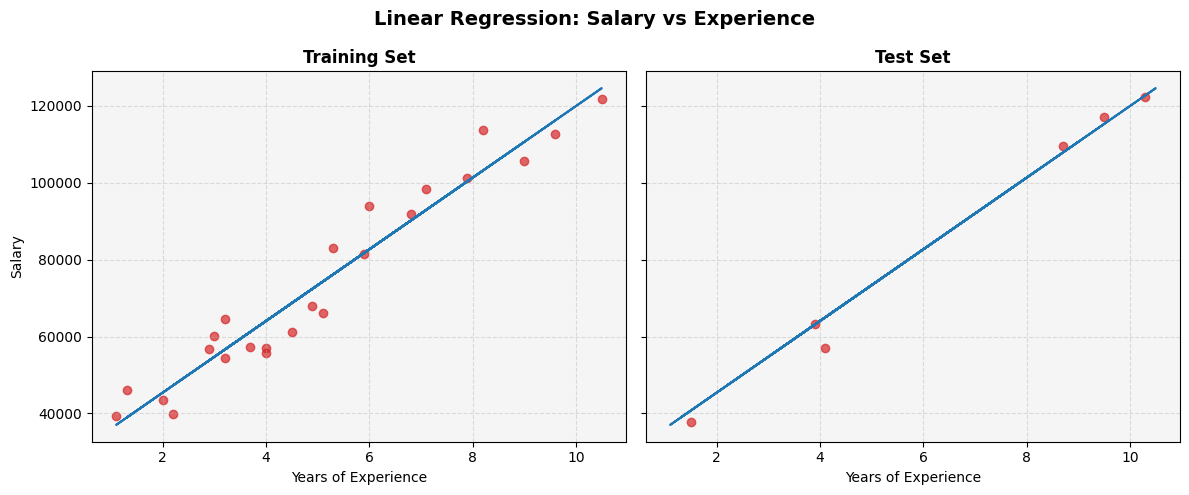

In [61]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Linear_Regression_Data.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# -------------------
# Train / Test Split
# -------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

# -------------------
# Train model
# -------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# -------------------
# Subplots
# -------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# --- Training Set ---
axes[0].scatter(X_train, y_train, color="tab:red", alpha=0.7)
axes[0].plot(
    X_train,
    regressor.predict(X_train),
    color="tab:blue",
    linewidth=1.5,
    linestyle="-"
)
axes[0].set_title("Training Set", fontweight="bold")
axes[0].set_xlabel("Years of Experience")
axes[0].set_ylabel("Salary")
axes[0].set_facecolor("whitesmoke")

# --- Test Set ---
axes[1].scatter(X_test, y_test, color="tab:red", alpha=0.7)
axes[1].plot(
    X_train,
    regressor.predict(X_train),
    color="tab:blue",
    linewidth=1.5,
    linestyle="-"
)
axes[1].set_title("Test Set", fontweight="bold")
axes[1].set_xlabel("Years of Experience")
axes[1].set_facecolor("whitesmoke")

# Grid for better readability
for ax in axes:
    ax.grid(True, linestyle="--", alpha=0.4)

plt.suptitle(
    "Linear Regression: Salary vs Experience",
    fontsize=14,
    fontweight="bold"
)

plt.tight_layout()
plt.show()

## Multiple Regression

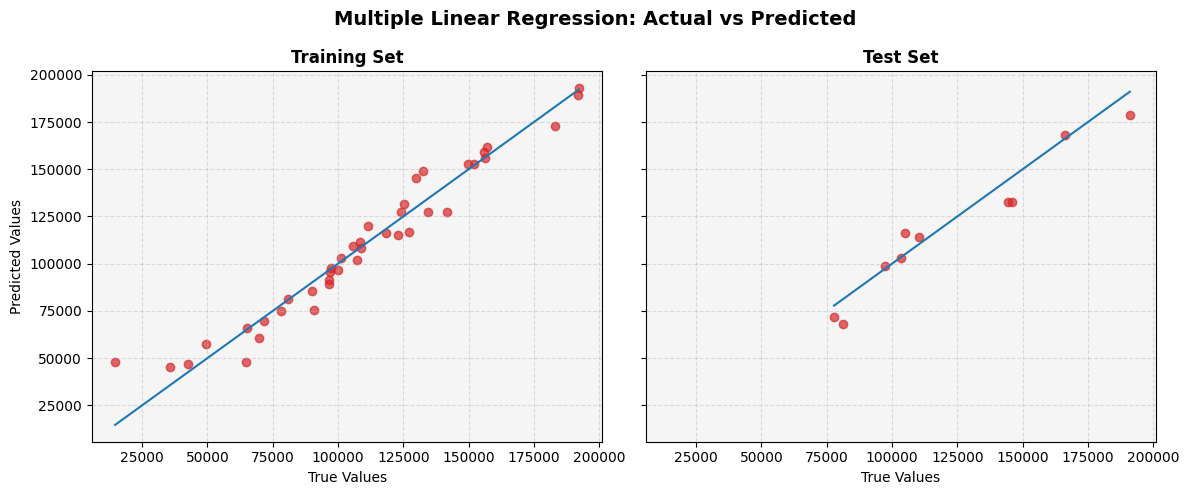

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Multiple_Regression_Data.csv")

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# -------------------
# Encoding Categorical Data
# -------------------

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [3])], 
    remainder='passthrough')

X = np.array(ct.fit_transform(X))

# -------------------
# Train / Test Split
# -------------------
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)
# -------------------
# Train model
# -------------------
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# -------------------
# Predictions
# -------------------
y_train_pred = regressor.predict(X_train)
y_test_pred = regressor.predict(X_test)

# -------------------
# Plot
# -------------------
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharex=True, sharey=True)

# --- Training Set ---
axes[0].scatter(
    y_train,
    y_train_pred,
    color="tab:red",
    alpha=0.7
)
axes[0].plot(
    [y_train.min(), y_train.max()],
    [y_train.min(), y_train.max()],
    color="tab:blue",
    linestyle="-",
    linewidth=1.5
)
axes[0].set_title("Training Set", fontweight="bold")
axes[0].set_xlabel("True Values")
axes[0].set_ylabel("Predicted Values")
axes[0].set_facecolor("whitesmoke")
axes[0].grid(True, linestyle="--", alpha=0.4)

# --- Test Set ---
axes[1].scatter(
    y_test,
    y_test_pred,
    color="tab:red",
    alpha=0.7
)
axes[1].plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    color="tab:blue",
    linestyle="-",
    linewidth=1.5
)
axes[1].set_title("Test Set", fontweight="bold")
axes[1].set_xlabel("True Values")
axes[1].set_facecolor("whitesmoke")
axes[1].grid(True, linestyle="--", alpha=0.4)

plt.suptitle(
    "Multiple Linear Regression: Actual vs Predicted",
    fontsize=14,
    fontweight="bold"
)

plt.tight_layout()
plt.show()

## Polynomial Regression

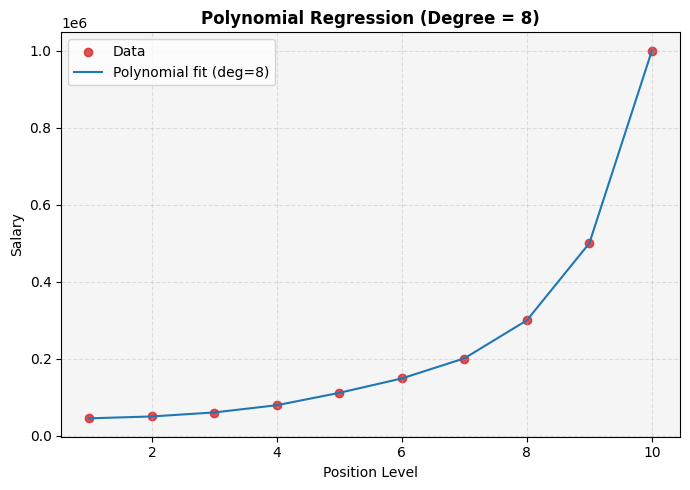

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Polynomial_Regression_Data.csv")
X = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

# -------------------
# Train polynomial model on whole data
# -------------------
poly_reg = PolynomialFeatures(degree=8)
X_poly = poly_reg.fit_transform(X)

regressor = LinearRegression()
regressor.fit(X_poly, y)

# -------------------
# Prediction
# -------------------
y_pred = regressor.predict(poly_reg.transform(X))

# -------------------
# Plot 
# -------------------
plt.figure(figsize=(7, 5))
plt.scatter(X, y, color="tab:red", alpha=0.8, label="Data")
plt.plot(X, y_pred, color="tab:blue", linewidth=1.5, label="Polynomial fit (deg=8)")

plt.title("Polynomial Regression (Degree = 8)", fontweight="bold")
plt.xlabel("Position Level")
plt.ylabel("Salary")

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()

plt.tight_layout()
plt.show()

## Support Vector Regression (SVR)

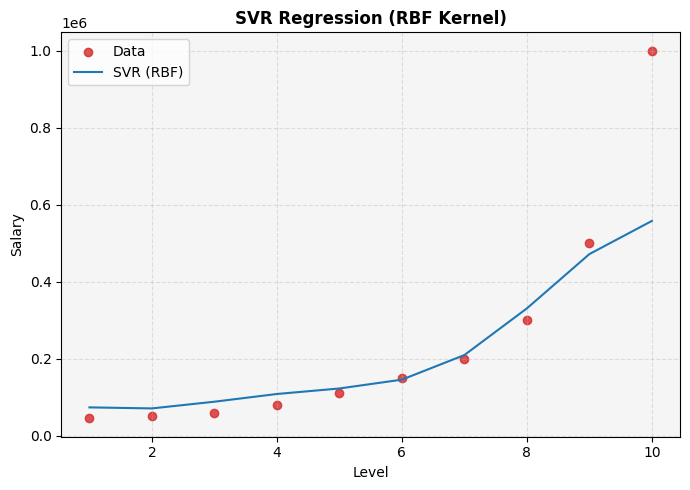

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

# -------------------
# Load data
# -------------------
df = pd.read_csv("test_datasets/Polynomial_Regression_Data.csv")

X = df.iloc[:, 1].values.reshape(-1, 1)
y = df.iloc[:, -1].values.reshape(-1, 1)

# -------------------
# Feature Scaling
# -------------------
sc_X = StandardScaler()
X_scaled = sc_X.fit_transform(X)

sc_y = StandardScaler()
y_scaled = sc_y.fit_transform(y).ravel()   # SVR needs 1D-Array

# -------------------
# Model Training (SVR)
# -------------------
regressor = SVR(kernel="rbf")
regressor.fit(X_scaled, y_scaled)

# -------------------
# Prediction
# -------------------
y_pred_scaled = regressor.predict(X_scaled).reshape(-1, 1)
y_pred = sc_y.inverse_transform(y_pred_scaled)

# -------------------
# Plot
# -------------------
plt.figure(figsize=(7, 5))

plt.scatter(
    X,
    y,
    color="tab:red",
    alpha=0.8,
    label="Data"
)

plt.plot(
    X,
    y_pred,
    color="tab:blue",
    linewidth=1.5,
    label="SVR (RBF)"
)

plt.title("SVR Regression (RBF Kernel)", fontweight="bold")
plt.xlabel(df.columns[1])      
plt.ylabel(df.columns[-1])

plt.gca().set_facecolor("whitesmoke")
plt.grid(True, linestyle="--", alpha=0.35)
plt.legend()
plt.tight_layout()
plt.show()

# Classification Models

## Classification Model Comparison with Confusion Matrices

This script benchmarks several classical machine learning classifiers  
(Logistic Regression, KNN, SVM, Naive Bayes, Decision Trees, Random Forest)  
using accuracy and normalized confusion matrices.  

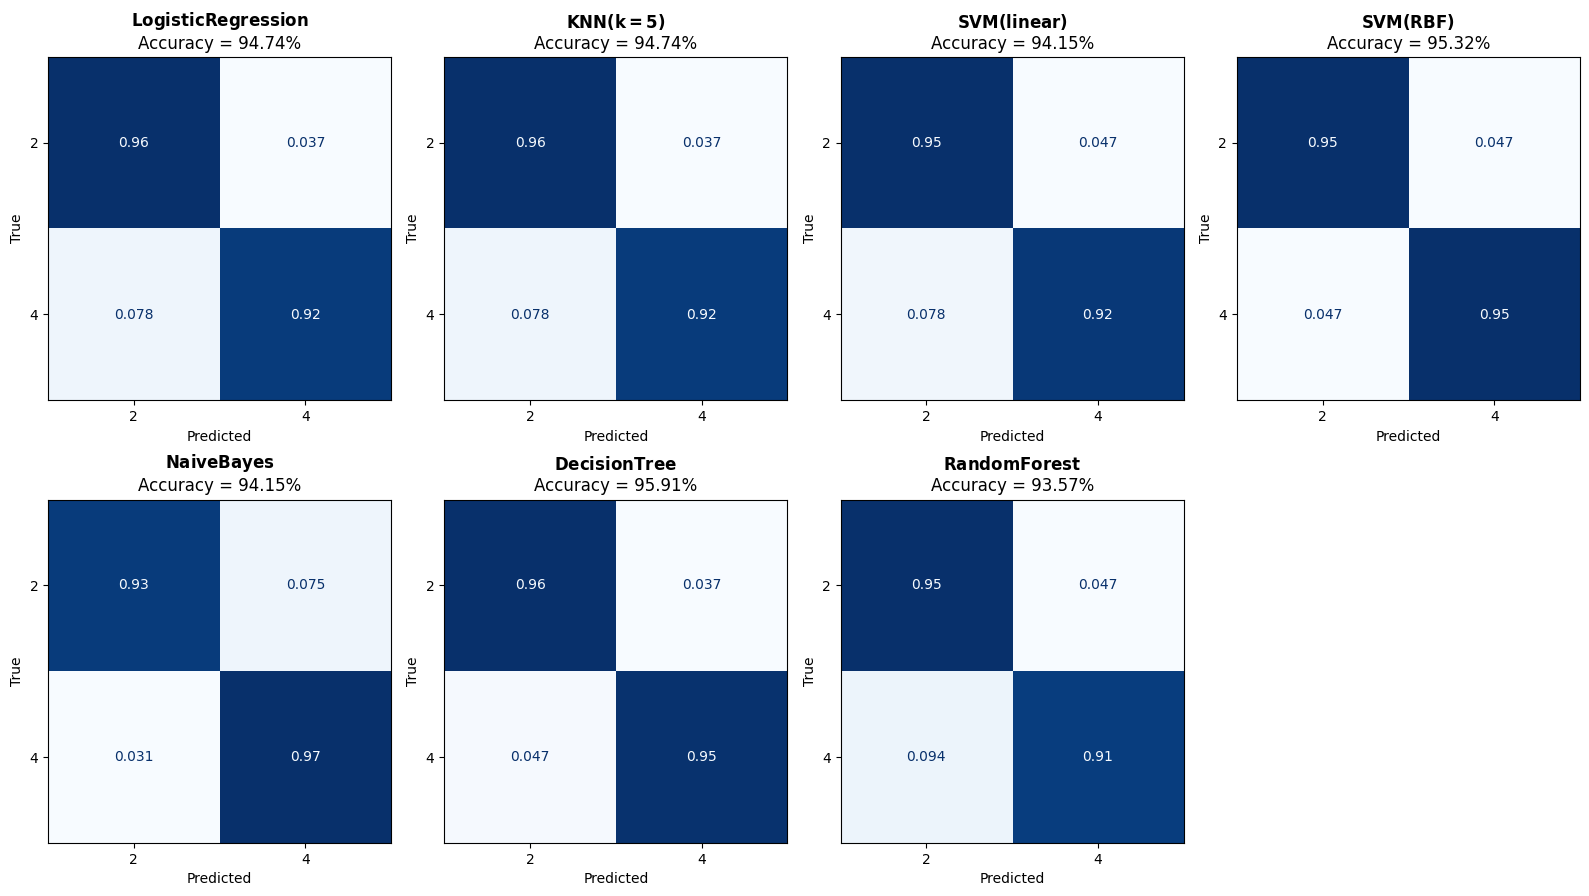

In [1]:
import math
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# -------------------
# Load data
# -------------------
dataset = pd.read_csv("test_datasets/Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# -------------------
# Define models
# -------------------
models = [
    ("Logistic Regression", LogisticRegression(random_state=0, max_iter=1000)),
    ("KNN (k=5)", KNeighborsClassifier(n_neighbors=5, metric="minkowski", p=2)),
    ("SVM (linear)", SVC(kernel="linear", random_state=0)),
    ("SVM (RBF)", SVC(kernel="rbf", random_state=0)),
    ("Naive Bayes", GaussianNB()),
    ("Decision Tree", DecisionTreeClassifier(criterion="entropy", random_state=0)),
    (
        "Random Forest",
        RandomForestClassifier(n_estimators=10, criterion="entropy", random_state=0),
    ),
]

# -------------------
# Plot confusion matrices in a grid
# -------------------
n_models = len(models)
n_cols = 4
n_rows = math.ceil(n_models / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(4 * n_cols, 4.5 * n_rows))
axes = axes.ravel()

for i, (name, model) in enumerate(models):
    ax = axes[i]

    model.fit(X_train, y_train)

    # Accuracy
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    # Confusion Matrix
    ConfusionMatrixDisplay.from_predictions(
        y_test, y_pred, ax=ax, cmap=plt.cm.Blues, normalize="true", colorbar=False
    )
    ax.set_title(rf"$\bf{{{name}}}$" + f"\nAccuracy = {acc:.2%}")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("True")

# Remove empty subplits
for j in range(n_models, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
plt.show()

## Visualising the Training set results

In [15]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# -------------------
# Load data
# -------------------
dataset = pd.read_csv("test_datasets/Data.csv")
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=0
)

# Scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# -------------------
# Define model
# -------------------
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)


y_pred = classifier.predict(X_test)


In [25]:
dataset.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


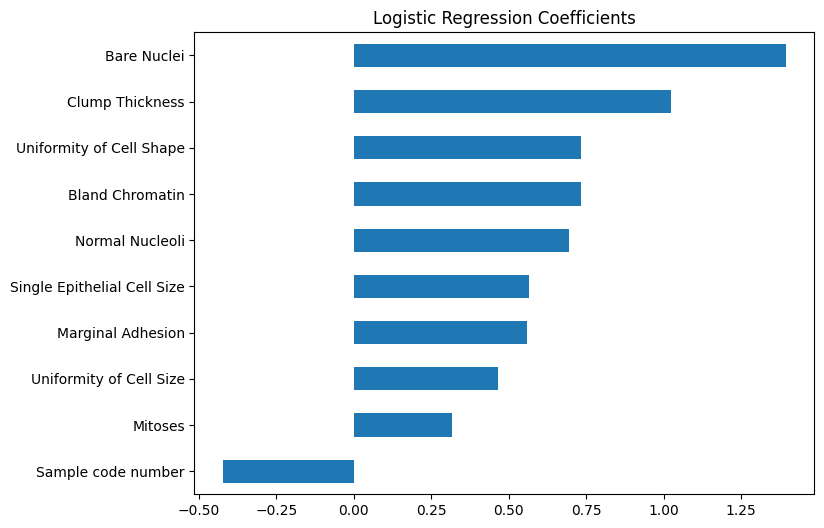

In [29]:
import pandas as pd

coef_df = pd.DataFrame(
    classifier.coef_[0],
    index=dataset.columns[:-1],
    columns=["Coefficient"]
).sort_values("Coefficient")

coef_df.plot(kind="barh", figsize=(8, 6), legend=False)
plt.title("Logistic Regression Coefficients")
plt.show()


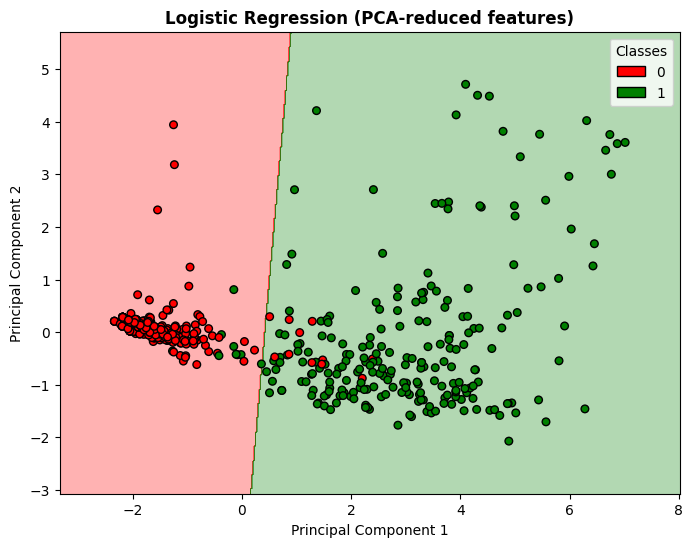

In [31]:
X = dataset.iloc[:, 1:-1].values   # alle echten Features
y = dataset.iloc[:, -1].values    # Class (2 / 4)

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

sc = StandardScaler()
X_scaled = sc.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state=0)
log_reg.fit(X_pca, y)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

X1, X2 = np.meshgrid(
    np.linspace(X_pca[:, 0].min()-1, X_pca[:, 0].max()+1, 500),
    np.linspace(X_pca[:, 1].min()-1, X_pca[:, 1].max()+1, 500)
)

Z = log_reg.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)

plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, alpha=0.3, cmap=ListedColormap(("red", "green")))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=ListedColormap(("red", "green")), edgecolor="k", s=30)

plt.title("Logistic Regression (PCA-reduced features)", fontweight="bold")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
legend_elements = [
    Patch(facecolor='red', edgecolor='k', label='0'),
    Patch(facecolor='green', edgecolor='k', label='1')
]
plt.legend(handles=legend_elements, title="Classes")
plt.show()

In [22]:
X_set = sc.inverse_transform(X_train)
y_set = y_train

cmap = ListedColormap(("red", "green"))

x1_min, x1_max = X_set[:, 0].min() - 10, X_set[:, 0].max() + 10
x2_min, x2_max = X_set[:, 1].min() - 1000, X_set[:, 1].max() + 1000

X1, X2 = np.meshgrid(
    np.arange(x1_min, x1_max, 50),
    np.arange(x2_min, x2_max, 50)
)

grid = np.c_[X1.ravel(), X2.ravel()]
Z = classifier.predict(sc.transform(grid)).reshape(X1.shape)

plt.contourf(X1, X2, Z, alpha=0.4, cmap=cmap)

plt.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=cmap, edgecolor="k")

plt.title("Decision Tree Classifier (Training Set)")
plt.xlabel("Age")
plt.ylabel("Estimated Salary")

legend_elements = [
    Patch(facecolor='red', edgecolor='k', label='Class 0'),
    Patch(facecolor='green', edgecolor='k', label='Class 1')
]
plt.legend(handles=legend_elements, title="Classes")

plt.show()

ValueError: X has 2 features, but StandardScaler is expecting 10 features as input.

## Visualising the Test set results